# Kaggle One week of Betfair data: 23 sports

A sample of Betfair data available on Kaggle(https://www.kaggle.com/datasets/zygmunt/betfair-sports). All sports except horse racing (for horse racing, there is a twin dataset at https://www.kaggle.com/zygmunt/betfair-horses).


The file has 1306731 data rows. It is 321 MB uncompressed.
Sports IDs:

1 - Soccer
2 - Tennis
3 - Golf
4 - Cricket
5 - Rugby Union
6 - Boxing
8 - Motor Sport
10 - Special Bets
11 - Cycling
1477 - Rugby League
3503 - Darts
3988 - Athletics
4339 - Greyhound Racing
6231 - Financial Bets
6422 - Snooker
6423 - American Football
7511 - Baseball
7522 - Basketball
7524 - Ice Hockey
61420 - Australian Rules
104049 - ? [1 row]
468328 - Handball
998917 - Volleyball
2152880 - Gaelic Games
26420387 - UFC

In [1]:
# do the usaul imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# set the theme to seaborn
sns.set()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [48]:
# load original dataset from a pickle file
betfair_df = pd.read_pickle("resources/betfair_dataset.pkl")
betfair_df.info()

betfair_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043349 entries, 0 to 1043348
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   SPORTS_ID         1043349 non-null  object 
 1   EVENT_ID          1043349 non-null  object 
 2   SETTLED_DATE      1043349 non-null  object 
 3   FULL_DESCRIPTION  1043349 non-null  object 
 4   SCHEDULED_OFF     1043349 non-null  object 
 5   EVENT             1043349 non-null  object 
 6   DT ACTUAL_OFF     1043349 non-null  object 
 7   SELECTION_ID      1043349 non-null  int64  
 8   SELECTION         1043349 non-null  object 
 9   ODDS              1043349 non-null  float64
 10  NUMBER_BETS       1043349 non-null  int64  
 11  VOLUME_MATCHED    1043349 non-null  float64
 12  LATEST_TAKEN      1043349 non-null  object 
 13  FIRST_TAKEN       1043349 non-null  object 
 14  WIN_FLAG          1043349 non-null  int64  
 15  IN_PLAY           1043349 non-null  object 
 16  

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT
0,Soccer,115279736,04-09-2014 17:07:30,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 15:30,Over/Under 1.5 Goals,04-09-2014 15:32:39,1221386,Over 1.5 Goals,1.35,7,765.54,04-09-2014 16:39:49,04-09-2014 16:39:28,1,IP,1033.4790,0.000
1,Tennis,115288925,04-09-2014 11:50:25,Group A/Brasov Challenger 2014/Second Round Ma...,04-09-2014 10:30,Match Odds,04-09-2014 10:34:32,7659748,Aslan Karatsev,1.12,41,3836.70,04-09-2014 11:44:26,04-09-2014 11:18:57,1,IP,4297.1040,0.000
2,Soccer,115196118,03-09-2014 15:08:55,U21 Euro Championship/Qualifiers/Fixtures 03 S...,03-09-2014 14:00,Over/Under 1.5 Goals,03-09-2014 14:00:45,1221386,Over 1.5 Goals,2.10,6,625.54,03-09-2014 15:00:37,03-09-2014 14:45:28,1,IP,1313.6340,0.000
3,Soccer,115236324,01-09-2014 19:46:39,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,01-09-2014 19:00,Over/Under 0.5 Goals,01-09-2014 19:01:34,5851483,Over 0.5 Goals,1.10,22,1176.46,01-09-2014 19:26:21,01-09-2014 19:20:00,1,IP,1294.1060,0.000
4,Soccer,115184779,02-09-2014 18:38:14,Swedish Soccer/Superettan/Fixtures 02 Septembe...,02-09-2014 17:20,Over/Under 1.5 Goals,02-09-2014 17:20:13,1221386,Over 1.5 Goals,1.34,19,903.18,02-09-2014 18:30:48,02-09-2014 18:28:48,1,IP,1210.2612,0.000
5,Soccer,115279787,04-09-2014 16:06:00,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 14:15,Over/Under 7.5 Goals,04-09-2014 14:15:00,1485573,Over 7.5 Goals,1.65,2,7.32,04-09-2014 15:25:40,04-09-2014 15:25:40,0,IP,0.0000,12.078
6,Tennis,115280497,05-09-2014 19:52:26,Group A/US Open 2014/Womens Tournament/Semi Fi...,05-09-2014 17:45,Game 06,05-09-2014 18:11:10,2309522,Caroline Wozniacki,1.37,3,110.00,05-09-2014 19:47:07,05-09-2014 19:46:50,1,IP,150.7000,0.000
7,Soccer,115279703,04-09-2014 02:55:01,Brazilian Soccer/Brazilian Cup/Fixtures 04 Sep...,04-09-2014 01:00,Over/Under 6.5 Goals,04-09-2014 00:59:48,2542448,Under 6.5 Goals,1.08,11,304.52,04-09-2014 02:11:01,04-09-2014 01:54:07,1,IP,328.8816,0.000
8,Soccer,115137087,01-09-2014 20:21:08,French Soccer/Ligue 2 Orange/Fixtures 01 Septe...,01-09-2014 18:30,Over/Under 2.5 Goals,01-09-2014 18:30:04,47972,Under 2.5 Goals,1.28,41,2053.18,01-09-2014 20:12:20,01-09-2014 18:58:13,1,IP,2628.0704,0.000
9,Soccer,115136802,01-09-2014 19:05:09,German Soccer/Bundesliga 2/Fixtures 01 Septemb...,01-09-2014 18:15,Half Time Score,01-09-2014 18:16:55,5,2 - 0,1.34,4,100.00,01-09-2014 18:55:18,01-09-2014 18:55:03,1,IP,134.0000,0.000


In [3]:
# load final dataset from a pickle file
betfair_df = pd.read_pickle("resources/betfair_final.pkl")
betfair_df.info()

betfair_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1011027 entries, 0 to 1043348
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   SPORTS_ID         1011027 non-null  object 
 1   EVENT_ID          1011027 non-null  object 
 2   SETTLED_DATE      1011027 non-null  object 
 3   FULL_DESCRIPTION  1011027 non-null  object 
 4   SCHEDULED_OFF     1011027 non-null  object 
 5   EVENT             1011027 non-null  object 
 6   DT ACTUAL_OFF     1011027 non-null  object 
 7   SELECTION_ID      1011027 non-null  int64  
 8   SELECTION         1011027 non-null  object 
 9   ODDS              1011027 non-null  float64
 10  NUMBER_BETS       1011027 non-null  int64  
 11  VOLUME_MATCHED    1011027 non-null  float64
 12  LATEST_TAKEN      1011027 non-null  object 
 13  FIRST_TAKEN       1011027 non-null  object 
 14  WIN_FLAG          1011027 non-null  int64  
 15  IN_PLAY           1011027 non-null  object 
 16  WIN_A

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Soccer,115279736,04-09-2014 17:07:30,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 15:30,Over/Under 1.5 Goals,04-09-2014 15:32:39,1221386,Over 1.5 Goals,1.35,...,1,IP,1033.4790,0.000,Ukraine,Kyiv,50.450034,30.524136,17.1,0.0
1,Tennis,115288925,04-09-2014 11:50:25,Group A/Brasov Challenger 2014/Second Round Ma...,04-09-2014 10:30,Match Odds,04-09-2014 10:34:32,7659748,Aslan Karatsev,1.12,...,1,IP,4297.1040,0.000,Romania,Brasov,45.652510,25.610565,22.1,0.0
2,Soccer,115196118,03-09-2014 15:08:55,U21 Euro Championship/Qualifiers/Fixtures 03 S...,03-09-2014 14:00,Over/Under 1.5 Goals,03-09-2014 14:00:45,1221386,Over 1.5 Goals,2.10,...,1,IP,1313.6340,0.000,Latvia,Riga,56.949398,24.105185,17.4,0.0
3,Soccer,115236324,01-09-2014 19:46:39,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,01-09-2014 19:00,Over/Under 0.5 Goals,01-09-2014 19:01:34,5851483,Over 0.5 Goals,1.10,...,1,IP,1294.1060,0.000,Ireland,Dublin,53.349379,-6.260559,16.1,0.0
4,Soccer,115184779,02-09-2014 18:38:14,Swedish Soccer/Superettan/Fixtures 02 Septembe...,02-09-2014 17:20,Over/Under 1.5 Goals,02-09-2014 17:20:13,1221386,Over 1.5 Goals,1.34,...,1,IP,1210.2612,0.000,Sweden,Stockholm,59.325117,18.071093,15.3,0.0
5,Soccer,115279787,04-09-2014 16:06:00,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 14:15,Over/Under 7.5 Goals,04-09-2014 14:15:00,1485573,Over 7.5 Goals,1.65,...,0,IP,0.0000,12.078,Kazakhstan,Astana,51.128220,71.430668,15.1,0.0
6,Tennis,115280497,05-09-2014 19:52:26,Group A/US Open 2014/Womens Tournament/Semi Fi...,05-09-2014 17:45,Game 06,05-09-2014 18:11:10,2309522,Caroline Wozniacki,1.37,...,1,IP,150.7000,0.000,USA,"Queens, NY",40.713508,-73.828313,27.9,0.0
7,Soccer,115279703,04-09-2014 02:55:01,Brazilian Soccer/Brazilian Cup/Fixtures 04 Sep...,04-09-2014 01:00,Over/Under 6.5 Goals,04-09-2014 00:59:48,2542448,Under 6.5 Goals,1.08,...,1,IP,328.8816,0.000,Brazil,Rio de Janeiro,-22.911014,-43.209373,19.8,0.0
8,Soccer,115137087,01-09-2014 20:21:08,French Soccer/Ligue 2 Orange/Fixtures 01 Septe...,01-09-2014 18:30,Over/Under 2.5 Goals,01-09-2014 18:30:04,47972,Under 2.5 Goals,1.28,...,1,IP,2628.0704,0.000,France,Paris,48.853495,2.348391,18.3,0.0
9,Soccer,115136802,01-09-2014 19:05:09,German Soccer/Bundesliga 2/Fixtures 01 Septemb...,01-09-2014 18:15,Half Time Score,01-09-2014 18:16:55,5,2 - 0,1.34,...,1,IP,134.0000,0.000,Germany,Berlin,52.517037,13.388860,16.8,1.0


In [4]:
betfair_df["SPORTS_ID"].value_counts()

SPORTS_ID
Soccer               829254
Tennis               115828
Basketball            24481
Golf                  21282
American Football      7479
Cricket                7378
Baseball               5325
Name: count, dtype: int64

Number of Bets:  7935585
Total Money Wagered: 805747319.31
Total Money Won:  810363762.3
Total Money Loss:  837893171.25
Money Difference:  -27529408.95


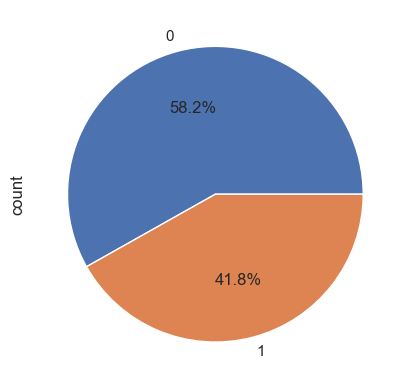

In [5]:
# lets get the number of best and money total
num_of_bets = betfair_df["NUMBER_BETS"].sum()
money_wagered = betfair_df["VOLUME_MATCHED"].sum()
money_won = betfair_df["WIN_AMOUNT"].sum()
money_loss = betfair_df["LOSS_AMOUNT"].sum()

print("Number of Bets: ", num_of_bets)
print("Total Money Wagered:", round(money_wagered, 2))
print("Total Money Won: ", round(money_won, 2))
print("Total Money Loss: ", round(money_loss, 2))
print("Money Difference: ", round(money_won - money_loss, 2))

# lets see the winning and lossing bets
betfair_df["WIN_FLAG"].value_counts().plot.pie(autopct='%1.1f%%');

Text(0, 0.5, 'Winning Percentage (%)')

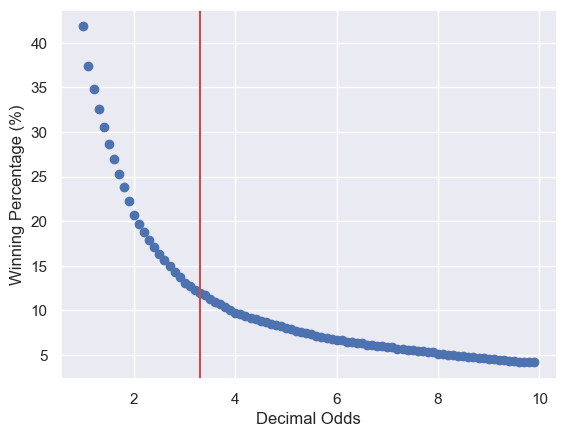

In [47]:
# create scatter plot showing odds vs winning percentage
odds = np.arange(1.0,10.0, 0.1)
per_list = []

for i in odds:
    underdogs =  betfair_df.loc[betfair_df["ODDS"] > i, ["ODDS", "WIN_FLAG"]]
    wins_df = underdogs.groupby("WIN_FLAG").count()
    losses = wins_df.iloc[0,0]
    wins = wins_df.iloc[1,0]
    per = (wins/(wins + losses)) *100
    per_list.append(per)
    #print(i, losses, wins, per)
   
plt.scatter(x=odds, y=per_list)
plt.axvline(x = 3.3, color = 'r', label = 'Underdog Point')
plt.xlabel("Decimal Odds"),
plt.ylabel("Winning Percentage (%)")

In [38]:
underdogs =  betfair_df.loc[betfair_df["ODDS"] > 3.3, ["WIN_AMOUNT", "LOSS_AMOUNT"]]
ps = underdogs.mean()
print(ps.iloc[0])
print(ps.iloc[1])

92.49484435190705
1270.4701811793234


Text(0, 0.5, 'Average wins/loss')

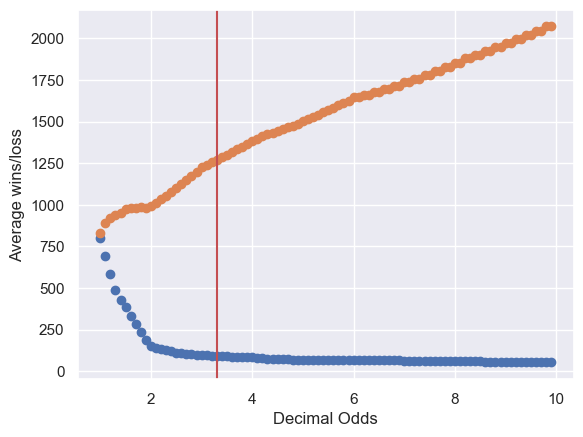

In [45]:
odds = np.arange(1.0,10.0, 0.1)
avg_win_list = []
avg_loss_list = []

for i in odds:
    underdogs =  betfair_df.loc[betfair_df["ODDS"] > i, ["WIN_AMOUNT", "LOSS_AMOUNT"]]
    wins_ps = underdogs.mean()
    avg_wins = wins_ps.iloc[0]
    avg_loss = wins_ps.iloc[1]
    avg_win_list.append(avg_wins)
    avg_loss_list.append(avg_loss)
    
plt.scatter(x=odds, y=avg_win_list)
plt.scatter(x=odds, y=avg_loss_list)
plt.axvline(x = 3.3, color = 'r', label = 'Underdog Point')
plt.xlabel("Decimal Odds"),
plt.ylabel("Average wins/loss")

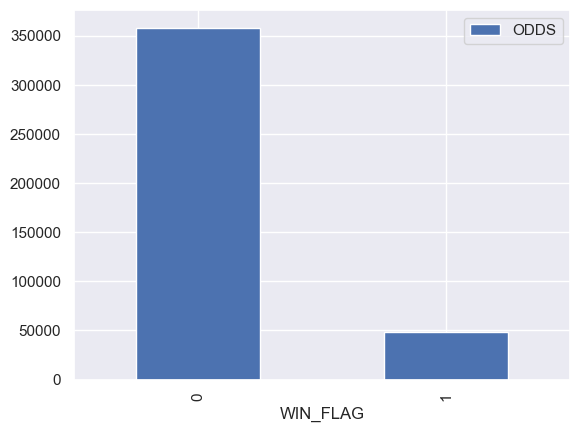

In [16]:
underdogs =  betfair_df.loc[betfair_df["ODDS"] > 3.3, ["ODDS", "WIN_FLAG"]]
underdogs_counts = underdogs.groupby("WIN_FLAG").count()
underdogs_counts.plot.bar();

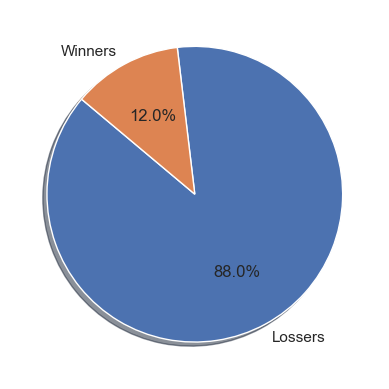

In [14]:
plt.pie([underdogs_counts.iloc[0,0], underdogs_counts.iloc[1,0]], labels=["Lossers", "Winners"],
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

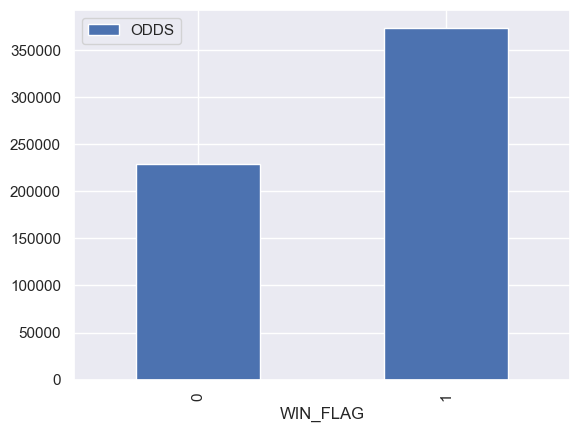

In [17]:
favorites =  betfair_df.loc[betfair_df["ODDS"] <= 3.3, ["ODDS", "WIN_FLAG"]]
favorites.groupby("WIN_FLAG").count().plot.bar();

<Axes: xlabel='SPORTS_ID'>

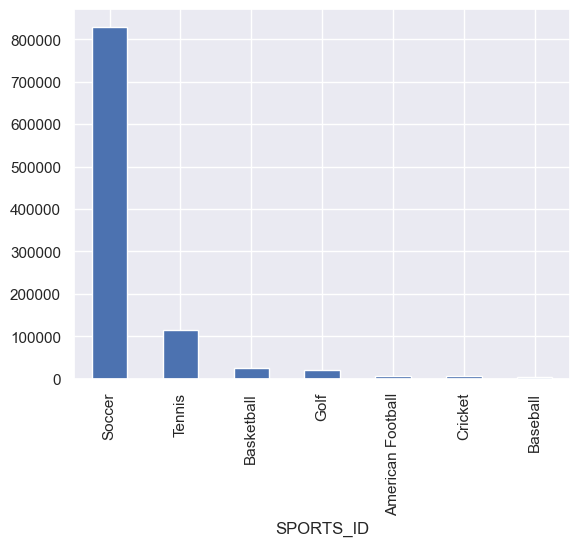

In [18]:
# lets see how many sports/events there are
sports = betfair_df["SPORTS_ID"].value_counts().sort_values(ascending=False)
sports

sports.plot.bar()

In [ ]:
# extract WNBA/NBA games
nba_df = betfair_df.loc[(betfair_df["SPORTS_ID"] == 7522) & 
                        betfair_df["FULL_DESCRIPTION"].str.contains("NBA")]

games_df = nba_df.groupby("FULL_DESCRIPTION")
games_df.count()